In [1]:
from pycaret.regression import *
import pandas as pd
import matplotlib.pyplot as plt
from functions import accuracy
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
df_raw = pd.read_csv('kunak_filled.csv', parse_dates=[0], index_col=0)
df=df_raw.asfreq('H', method='pad')
df.tail()

,Dew Point (C),H2S (ppb),NO2 (ppb),Humidity (%),O3 (ppb),PM1 (ug/m3),PM2.5 (ug/m3),PM10 (ug/m3),Temp (C)
Datetime,,,,,,,,,
2022-09-04 19:00:00,20.87,25.62,64.94,34.10,41.54,11.51,12.65,15.85,28.09
2022-09-04 20:00:00,20.86,23.35,68.57,30.23,42.27,12.30,13.43,16.74,27.15
2022-09-04 21:00:00,20.92,17.31,71.04,25.90,42.23,12.83,13.93,17.00,26.60
2022-09-04 22:00:00,21.00,12.59,72.10,22.36,39.23,12.68,13.68,16.48,26.44
2022-09-04 23:00:00,21.65,18.57,79.41,25.57,42.37,12.88,14.02,18.21,25.55


In [3]:
target = 'NO2 (ppb)'
ignore_list = ['PM1 (ug/m3)', 'PM10 (ug/m3)'] if target=='PM2.5 (ug/m3)' else []

steps = int(df.shape[0]*0.25)
train = df[:-steps]
test = df[-steps:-steps+(24*7)]

numeric_features = df.columns.drop(target).to_list()

In [4]:
s = setup(data=train, test_data=test, target=target, fold_strategy='timeseries',
          numeric_features=numeric_features, ignore_features=ignore_list,
          fold=10,silent=True, session_id=123, verbose=0)

### Training and Validation of various models

In [5]:
#comparison = compare_models()

### Επιλογή Random Forest (αποδεκτές επιδόσεις, δοκιμασμένος στη βιβλιογραφία)

In [6]:
model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.9440,75.5847,8.6939,0.7071,0.1624,0.1288
1,2.5124,15.2510,3.9052,0.9259,0.0604,0.0416
2,3.1432,22.1298,4.7042,0.9012,0.0918,0.0658
3,5.0731,43.1242,6.5669,0.8039,0.1350,0.1037
4,3.0256,17.5144,4.1850,0.9202,0.1043,0.0732
5,2.1392,12.3434,3.5133,0.9524,0.0476,0.0315
6,1.5352,5.8705,2.4229,0.9671,0.0488,0.0311
7,1.0778,3.5327,1.8795,0.9855,0.0495,0.0257
8,0.8495,2.1059,1.4512,0.9868,0.0430,0.0269


### Πρόβλεψη NO2

In [7]:
predictions = predict_model(model, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.3369,0.2107,0.4590,0.9983,0.0148,0.0097


In [8]:
errors_list = [mean_absolute_error(predictions[target], predictions.Label),
               mean_squared_error(predictions[target], predictions.Label),
              accuracy(predictions[target], predictions.Label)['mape'],
              r2_score(predictions[target], predictions.Label)]

errors_series = pd.Series(errors_list, index=['MAE','MSE','MAPE','R2'])
target_name = 'PM2.5' if target=='PM2.5 (ug/m3)' else target
errors_series.to_csv(f'{target_name}_rf_metrics.csv')
print(errors_series.round(3))

MAE     0.337
MSE     0.211
MAPE    0.010
R2      0.998
dtype: float64


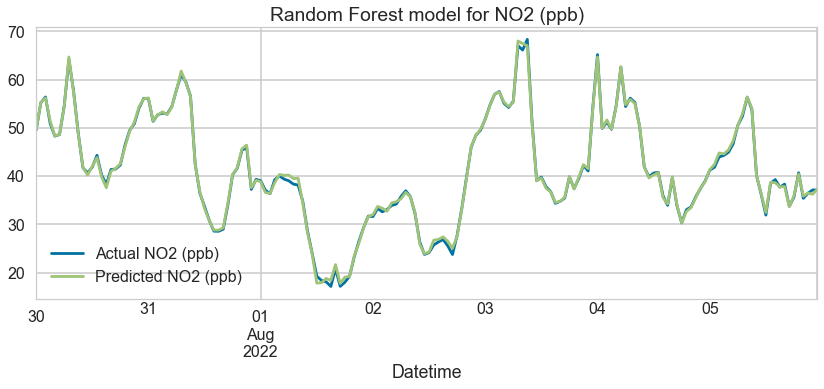

In [9]:
plt.style.use('seaborn-poster')
predictions[[target, 'Label']].plot(figsize=(14,5))
plt.legend([f'Actual {target_name}', f'Predicted {target_name}'])
plt.title(f"Random Forest model for {target_name}")
plt.savefig(f"Plots/rf/{target_name}rf.png")
plt.show()

In [10]:
plot_model(model, plot='feature', save=True)

'Feature Importance.png'

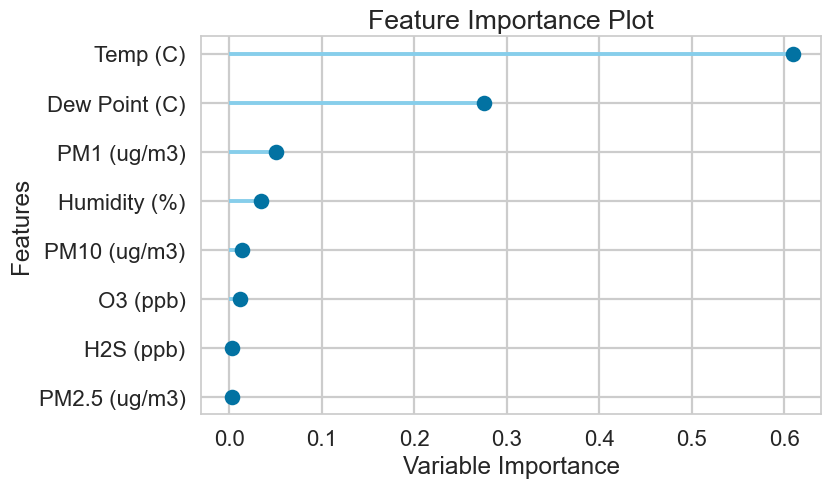

In [11]:
plot_model(model, plot='feature')